In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# 강아지 데이터 다운로드
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling stanford_dogs-train.tfrecord...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling stanford_dogs-test.tfrecord...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /aiffel/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device

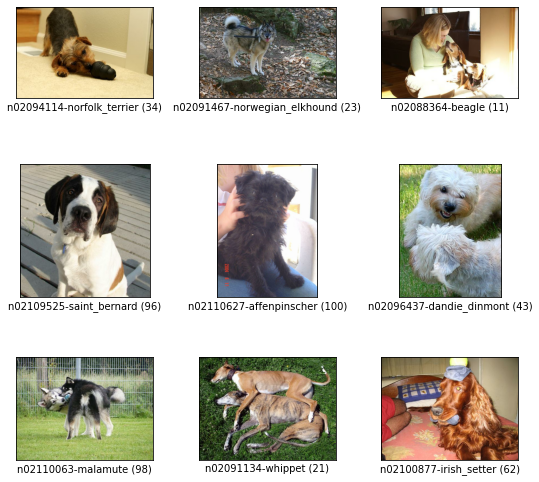

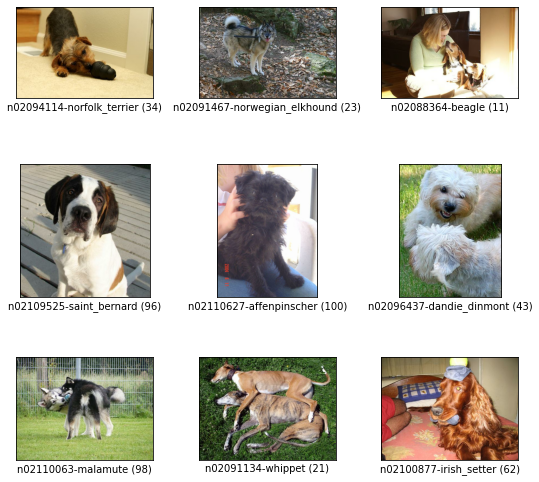

In [6]:
tfds.show_examples(ds_train, ds_info)

In [8]:
# normalize, resize
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

In [10]:
# augment
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [11]:
# 데이터셋(ds)을 가공하는 메인함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # 기본적인 전처리 함수 적용
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [12]:
# class 개수
num_classes = ds_info.features["label"].num_classes

# 일반 데이터 학습을 위한 학습된 resnet50
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/ta

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localh

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localh

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/rep

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:loca

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/rep

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/re

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/re

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/re

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:local

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localh

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localh

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/re

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
94781440/94765736 [==============================] - 0s 0us/step
Executing op _EagerConst in device /j

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

In [13]:
# aug 데이터 학습을 위한 학습된 resnet50
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/rep

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/re

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/re

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/rep

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/t

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

In [14]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

# no_aug와 aug 학습데이터 준비
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelInterleaveDatasetV4 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssertCardinalityDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/t

In [15]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 3

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/3
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _Eag

SGD/gradientExecuting op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0
s/zeros_207: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential/resnet50/pool1_pad/Rank: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential/resnet50/pool1_pad/stack/1: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential/resnet50/pool1_pad/Slice/begin: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential/resnet50/pool1_pad/Reshape/shape: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_208: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_209: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_210: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_211: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/SGD/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0


109/750 [===>..........................] - ETA: 1:55 - loss: 4.3486 - accuracy: 0.1049Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


153/750 [=====>........................] - ETA: 1:46 - loss: 3.9854 - accuracy: 0.1524Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


197/750 [======>.......................] - ETA: 1:37 - loss: 3.7108 - accuracy: 0.1869Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


241/750 [========>.....................] - ETA: 1:29 - loss: 3.4748 - accuracy: 0.2233Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


285/750 [==========>...................] - ETA: 1:22 - loss: 3.2569 - accuracy: 0.2566Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


329/750 [============>.................] - ETA: 1:14 - loss: 3.0852 - accuracy: 0.2846Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


373/750 [=============>................] - ETA: 1:06 - loss: 2.9427 - accuracy: 0.3065Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


417/750 [===============>..............] - ETA: 58s - loss: 2.8188 - accuracy: 0.3282Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


505/750 [===================>..........] - ETA: 43s - loss: 2.6262 - accuracy: 0.3646Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


593/750 [======================>.......] - ETA: 27s - loss: 2.4668 - accuracy: 0.3928Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


681/750 [==========================>...] - ETA: 12s - loss: 2.3232 - accuracy: 0.4249Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 2.2212 - accuracy: 0.4464Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
V2/dense_keys: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/ParseExampleV2/ragged_keys: (Const): /job:localhost/replica:0/task:0/device:CPU:0
Reshape/shape: (Const): /job:localhost/replica:0/task:0/device:CPU:0
Reshape/shape_1: (Const): /job:localhost/replica:0/task:0/device:CPU:0
Reshape_1/shape: (C

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
 /job:localhost/replica:0/task:0/device:CPU:0
Reshape_3: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
Identity_1: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
Ident

sparse_categorical_crossentropy/Reshape_1/shape/0: (Const): /job:localhExecuting op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test

Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


 59/750 [=>............................] - ETA: 2:01 - loss: 1.0807 - accuracy: 0.7044Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


103/750 [===>..........................] - ETA: 1:54 - loss: 1.0805 - accuracy: 0.7015Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


147/750 [====>.........................] - ETA: 1:46 - loss: 1.0379 - accuracy: 0.7143Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


191/750 [======>.......................] - ETA: 1:38 - loss: 1.0043 - accuracy: 0.7222Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


235/750 [========>.....................] - ETA: 1:30 - loss: 0.9766 - accuracy: 0.7261Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


279/750 [==========>...................] - ETA: 1:22 - loss: 0.9500 - accuracy: 0.7319Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


323/750 [===========>..................] - ETA: 1:15 - loss: 0.9405 - accuracy: 0.7353Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


367/750 [=============>................] - ETA: 1:07 - loss: 0.9127 - accuracy: 0.7435Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


411/750 [===============>..............] - ETA: 59s - loss: 0.8892 - accuracy: 0.7497Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


499/750 [==================>...........] - ETA: 44s - loss: 0.8560 - accuracy: 0.7575Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


587/750 [======================>.......] - ETA: 28s - loss: 0.8268 - accuracy: 0.7647Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


675/750 [==========================>...] - ETA: 13s - loss: 0.7828 - accuracy: 0.7784Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 0.7514 - accuracy: 0.7887Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
ost/replica:0/task:0/device:GPU:0
sparse_categorical_crossentropy/weighted_loss/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0
sparse_categorical_crossentropy/weighted_loss/Const_1: (Const): /job:localhost/replica:0/task:0/device:GPU:0
sparse_categorical_crossentropy/weighted_loss/Rank: (Const): /job:localhost/replica:0/task:0/device:GPU:0
sparse_categorical_crossentropy/weighted_loss/range/start: (Const): /job:localhost/replica:0/task:0/device:GPU:0
sparse_categorical_crossentropy/weighted_loss/range/delta: (Const): /job:localhost/replica:0/task:0/device:GPU:0
strided_slice/stack: (Const): /job:localhost/replica:0/task:0/device:GPU:0
strid

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1

Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


 99/750 [==>...........................] - ETA: 1:54 - loss: 0.3651 - accuracy: 0.9141Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


143/750 [====>.........................] - ETA: 1:47 - loss: 0.3475 - accuracy: 0.9174Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


187/750 [======>.......................] - ETA: 1:39 - loss: 0.3303 - accuracy: 0.9241Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


231/750 [========>.....................] - ETA: 1:31 - loss: 0.3195 - accuracy: 0.9275Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


275/750 [==========>...................] - ETA: 1:23 - loss: 0.2997 - accuracy: 0.9336Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


319/750 [===========>..................] - ETA: 1:15 - loss: 0.2915 - accuracy: 0.9359Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


363/750 [=============>................] - ETA: 1:08 - loss: 0.2809 - accuracy: 0.9394Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


407/750 [===============>..............] - ETA: 1:00 - loss: 0.2733 - accuracy: 0.9413Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


495/750 [==================>...........] - ETA: 44s - loss: 0.2589 - accuracy: 0.9446Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


583/750 [======================>.......] - ETA: 29s - loss: 0.2443 - accuracy: 0.9488Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


671/750 [=========================>....] - ETA: 13s - loss: 0.2296 - accuracy: 0.9531Executing op __inference_train_function_15271 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9567Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
 /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_1: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_2: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_3: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/ParseExampleV2/names: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/ParseExampleV2/sparse_keys: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExamp

FlatMapDataset: (FlatMapDataset): /job:localhost/replica:0/task:0/device:CPU:0
NoOp: (NoOp): /job:localhost/replica:0/task:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink0: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
flat_filenames/shape: (Const): /job:localhost/replica:0/task:0/device:CPU:0
args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/ParseExampleV2: (ParseExampleV2): /job:localhost/replica:0/task:0/device:CPU:0
Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
Reshape_1: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
Reshape_2: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
Reshape_3: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/

Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_18002 in device /job:localhost/replica:0/task:0/device:GPU:0


In [16]:
aug_resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_aug = aug_resnet50.fit(
    ds_train_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /

SGD/gradients/zeros_206: (Const):Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0
 /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_207: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential_1/resnet50/pool1_pad/Rank: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential_1/resnet50/pool1_pad/stack/1: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential_1/resnet50/pool1_pad/Slice/begin: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gradient_tape/sequential_1/resnet50/pool1_pad/Reshape/shape: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_208: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_209: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_210: (Const): /job:localhost/replica:0/task:0/device:GPU:0
SGD/gradients/zeros_211: (Const): /job:localhost/replica:0/ta

 44/750 [>.............................] - ETA: 2:03 - loss: 4.8472 - accuracy: 0.0341Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/750 [==>...........................] - ETA: 1:56 - loss: 4.5082 - accuracy: 0.0732Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


132/750 [====>.........................] - ETA: 1:48 - loss: 4.1441 - accuracy: 0.1236Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


176/750 [======>.......................] - ETA: 1:41 - loss: 3.8401 - accuracy: 0.1680Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


220/750 [=======>......................] - ETA: 1:33 - loss: 3.5913 - accuracy: 0.2023Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


264/750 [=========>....................] - ETA: 1:26 - loss: 3.3698 - accuracy: 0.2363Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


308/750 [===========>..................] - ETA: 1:18 - loss: 3.1944 - accuracy: 0.2660Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


352/750 [=============>................] - ETA: 1:10 - loss: 3.0385 - accuracy: 0.2912Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


396/750 [==============>...............] - ETA: 1:02 - loss: 2.9143 - accuracy: 0.3112Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


440/750 [================>.............] - ETA: 54s - loss: 2.8100 - accuracy: 0.3301Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


528/750 [====================>.........] - ETA: 39s - loss: 2.6316 - accuracy: 0.3595Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


616/750 [=======================>......] - ETA: 23s - loss: 2.4819 - accuracy: 0.3879Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


704/750 [===========================>..] - ETA: 8s - loss: 2.3420 - accuracy: 0.4164Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 2.2760 - accuracy: 0.4312Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
CPU:0
random_flip_left_right/switch_pred/_2: (Switch): /job:localhost/replica:0/task:0/device:CPU:0
random_flip_left_right/pivot_f/_3: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_flip_left_right/pivot_t/_4: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_flip_left_right/random_flip_left_right/control_depe

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
 /job:localhost/replica:0/task:0/device:CPU:0
truediv: (RealDiv): /job:localhost/replica:0/task:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
Identity_1: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink0: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink1: (Identity): /j

ArgMax: (ArgMax): /job:localhost/replica:0/task:0/deExecuting op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
vice:GPU:0
Cast_2: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
Cast_3: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
Sum_2: (Sum): /job:localhost/replica:0/task:0/device:GPU:0
AssignAddVariableOp_2: (AssignAddVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
Size: (Size): /job:localhost/replica:0/task:0/device:GPU:0
Cast_4: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
AssignAddVariableOp_3: (AssignAddVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
div_no_nan/ReadVariableOp: (ReadVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
div_no_nan/ReadVariableOp_1: (ReadVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
div_no_nan: (DivNoNan): /job:localhost/replica:0/task:0/device:GPU:0
Identity: (Identity): /job:localhost/repli

Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
750/750 [==============================] - 167s 213ms/step - loss: 2.2760 - accuracy: 0.4312 - val_loss: 2.9881 - val_accuracy: 0.2640
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:

124/750 [===>..........................] - ETA: 1:50 - loss: 1.1752 - accuracy: 0.6709Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


168/750 [=====>........................] - ETA: 1:42 - loss: 1.1376 - accuracy: 0.6793Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


212/750 [=======>......................] - ETA: 1:34 - loss: 1.1089 - accuracy: 0.6840Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


256/750 [=========>....................] - ETA: 1:27 - loss: 1.0900 - accuracy: 0.6875Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


300/750 [===========>..................] - ETA: 1:19 - loss: 1.0666 - accuracy: 0.6931Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


344/750 [============>.................] - ETA: 1:11 - loss: 1.0638 - accuracy: 0.6933Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


388/750 [==============>...............] - ETA: 1:03 - loss: 1.0466 - accuracy: 0.6981Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


432/750 [================>.............] - ETA: 56s - loss: 1.0370 - accuracy: 0.7023Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


520/750 [===================>..........] - ETA: 40s - loss: 1.0075 - accuracy: 0.7125Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


608/750 [=======================>......] - ETA: 25s - loss: 0.9788 - accuracy: 0.7196Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


696/750 [==========================>...] - ETA: 9s - loss: 0.9516 - accuracy: 0.7260Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 0.9324 - accuracy: 0.7322Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
ask:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink0: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
compression_type: (Const): /job:localhost/replica:0/task:0/device:CPU:0
buffer_size: (Const): /job:localhost/replica:0/task:0/device:CPU:0
args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
args_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
args_2: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
args_3: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
flat_filenames: (Reshape): /job:localhost/replica:0/

Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


110/750 [===>..........................] - ETA: 1:52 - loss: 0.6370 - accuracy: 0.8193Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


154/750 [=====>........................] - ETA: 1:45 - loss: 0.6349 - accuracy: 0.8218Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


198/750 [======>.......................] - ETA: 1:37 - loss: 0.6273 - accuracy: 0.8220Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


242/750 [========>.....................] - ETA: 1:29 - loss: 0.6163 - accuracy: 0.8252Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


286/750 [==========>...................] - ETA: 1:21 - loss: 0.6056 - accuracy: 0.8278Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


330/750 [============>.................] - ETA: 1:14 - loss: 0.5928 - accuracy: 0.8324Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


374/750 [=============>................] - ETA: 1:06 - loss: 0.5804 - accuracy: 0.8369Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


418/750 [===============>..............] - ETA: 58s - loss: 0.5695 - accuracy: 0.8409Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


506/750 [===================>..........] - ETA: 43s - loss: 0.5545 - accuracy: 0.8454Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


594/750 [======================>.......] - ETA: 27s - loss: 0.5415 - accuracy: 0.8502Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


682/750 [==========================>...] - ETA: 12s - loss: 0.5262 - accuracy: 0.8554Executing op __inference_train_function_29458 in device /job:localhost/replica:0/task:0/device:GPU:0


750/750 [==============================] - ETA: 0s - loss: 0.5085 - accuracy: 0.8607Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
st/replica:0/task:0/device:CPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
Identity_1: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink0: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
FakeSink1: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
identity_1_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
args_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
resize/Re

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_3

Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_32189 in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
# 실험중
import tensorflow as tf
import json
from tensorflow.keras.callbacks import ModelCheckpoint

# 콜백 설정
callbacks = [
    ModelCheckpoint(
        "best_model.h5",  # 저장할 모델 파일명
        monitor="val_accuracy",  # 검증 정확도 기준으로 저장
        save_best_only=True,  # 가장 좋은 모델만 저장
        mode="max",  # 높은 값이 더 좋은 경우 ('accuracy'는 높을수록 좋음)
        verbose=1
    )
]

# 모델 학습
history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug,  # augmentation 적용하지 않은 데이터셋
    steps_per_epoch=int(ds_info.splits['train'].num_examples / 16),
    validation_steps=int(ds_info.splits['test'].num_examples / 16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
    callbacks=callbacks  # 콜백 추가
)

# 학습 기록 저장 (JSON 파일)
history_dict = history_resnet50_no_aug.history  # 학습 기록 가져오기
with open("training_history.json", "w") as f:
    json.dump(history_dict, f)


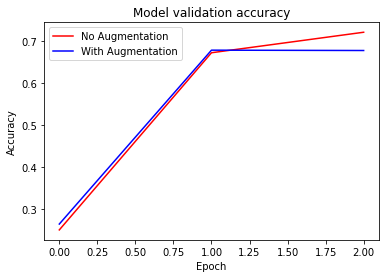

In [17]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.show()

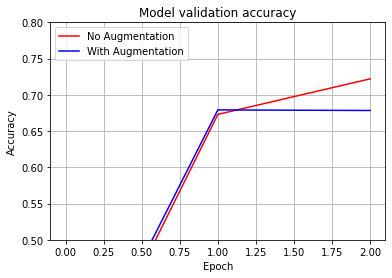

In [18]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # 출력하고자 하는  Accuracy 범위를 지정해 주세요. 
#plt.ylim(0.72, 0.76)  # EPOCH=20으로 진행한다면 이 범위가 적당합니다. 
plt.show()

# Cutmix Augmentation

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
identity_2_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
identity_3_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_1: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_2: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/Const_3: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample/ParseExampleV2/names: (Const): /job:localhost/replica:0/task:0/device:CPU:0
ParseSingleExample/ParseExample

resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/tasExecuting op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhos

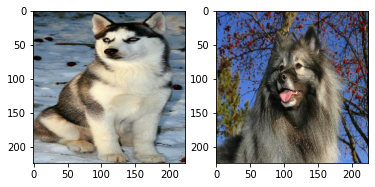

In [19]:
import matplotlib.pyplot as plt

# 데이터셋에서 이미지 2개를 가져옵니다. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

In [20]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+height//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sqrt in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0

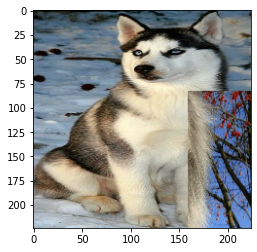

In [21]:
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_b의 왼쪽 바깥 영역
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_b의 안쪽 영역
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_b의 오른쪽 바깥 영역
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

In [22]:
# mix two labels
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:loc

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [23]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

# Mixup Augmentation

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


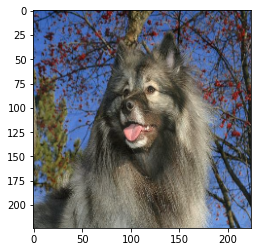

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.11830461 

In [24]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

In [25]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

=3
